LAB 1

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0808 - val_loss: 0.0284
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0259 - val_loss: 0.0204
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0190 - val_loss: 0.0162
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0154 - val_loss: 0.0139
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0135 - val_loss: 0.0127
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0124 - val_loss: 0.0119
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0117 - val_loss: 0.0113
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0112 - val_loss: 0.0109
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 10/10
235/235 ━━━━━━━━━━━━

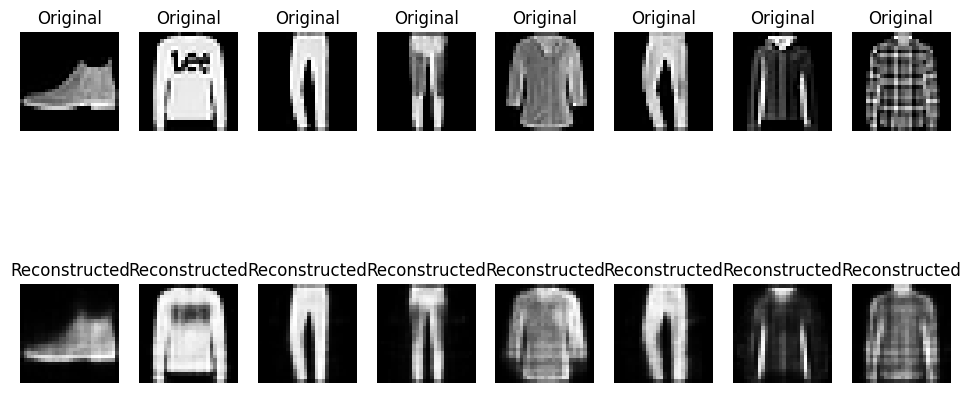

 Manual Reconstruction loss : 0.01027834601700306


In [1]:
#design a simple autoencoder
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

class SimpleAutoencoder(Model):
    def __init__(self, latent_dimensions):
        super(SimpleAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Flatten(),
            layers.Dense(latent_dimensions, activation='relu'),
        ])

        self.decoder = tf.keras.Sequential([
            layers.Dense(28 * 28, activation='sigmoid'),
            layers.Reshape((28, 28, 1))
        ])

    def call(self, input_data):
        encoded = self.encoder(input_data)
        decoded = self.decoder(encoded)
        return decoded

latent_dimensions = 64
autoencoder = SimpleAutoencoder(latent_dimensions)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 8
plt.figure(figsize=(12, 6))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

mse=np.mean(np.square(x_test- decoded_imgs))
print(f" Manual Reconstruction loss : {mse}")